Importing Libraries

In [2]:
import pandas as pd
import numpy as np

Importing dataset 

In [3]:
data=pd.read_csv('glass1.txt')

In [4]:
data.columns=['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']

In [5]:
data

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [6]:
data.shape

(213, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             213 non-null    int64  
 1   RI             213 non-null    float64
 2   Na             213 non-null    float64
 3   Mg             213 non-null    float64
 4   Al             213 non-null    float64
 5   Si             213 non-null    float64
 6   K              213 non-null    float64
 7   Ca             213 non-null    float64
 8   Ba             213 non-null    float64
 9   Fe             213 non-null    float64
 10  Type of glass  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [8]:
data.isnull().sum()

ID               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

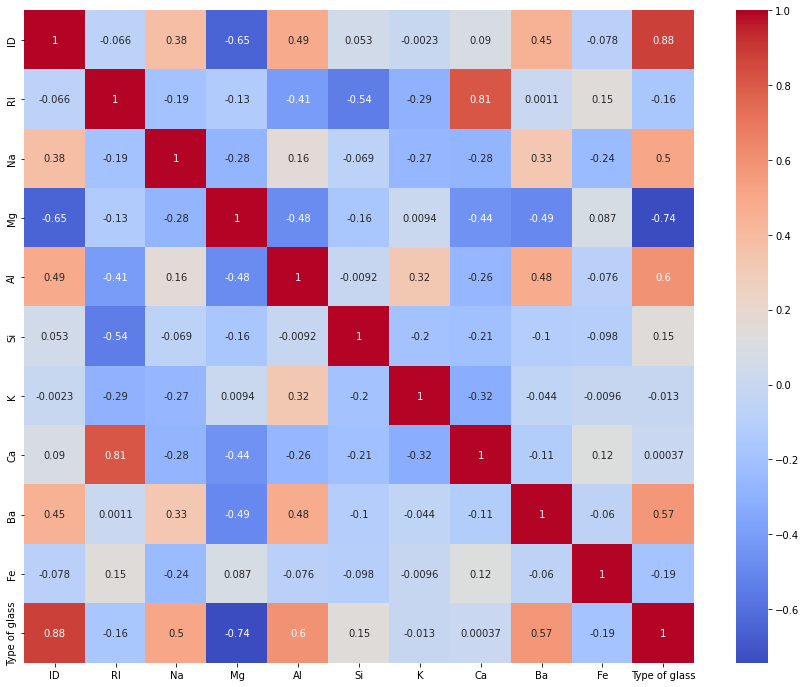

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [10]:
drop_col=['Ca','K','ID']
data=data.drop(drop_col,axis=1)

In [11]:
data.head()

,RI,Na,Mg,Al,Si,Ba,Fe,Type of glass
0,1.51761,13.89,3.60,1.36,72.73,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.0,0.26,1


#Splitting the dataset

In [12]:
X=data.iloc[:,:-1]
y=data['Type of glass']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


#Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance
 

#KNN model for Square Euclidean Distance Metrics

In [15]:
model1=KNeighborsClassifier(metric=distance.sqeuclidean)
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)

In [16]:
sc1=model1.score(X_test,y_test)
sc1

0.6046511627906976

#KNN model for Manhattan distance metric

In [17]:
model2=KNeighborsClassifier(metric=distance.cityblock)
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)

In [18]:
sc2=model2.score(X_test,y_test)
sc2

0.627906976744186

In [19]:
df = pd.DataFrame({'actual': y_test, 'manhattan': y_pred2, 'Sqeuclid': y_pred1})
df.head()

,actual,manhattan,Sqeuclid
206,7,7,7
84,2,2,2
83,2,2,2
4,1,2,2
77,2,2,1


#Accuracies

In [20]:
e=sc1*100
m=sc2*100

print('Squared_Euclidean_accuracy :'+str(e)+' %')
print('Manhattan_accuracy :'+str(m)+ ' %')

Squared_Euclidean_accuracy :60.46511627906976 %
Manhattan_accuracy :62.7906976744186 %


#Classification Reports

In [21]:
from sklearn.metrics import classification_report
print('Squared_Euclidean_model: ',classification_report(y_test,y_pred1))

Squared_Euclidean_model:                precision    recall  f1-score   support

           1       0.57      0.76      0.65        17
           2       0.54      0.47      0.50        15
           3       0.00      0.00      0.00         4
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3

    accuracy                           0.60        43
   macro avg       0.63      0.65      0.64        43
weighted avg       0.55      0.60      0.57        43



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
print('Manhattan_model: ',classification_report(y_test,y_pred2))

Manhattan_model:                precision    recall  f1-score   support

           1       0.61      0.82      0.70        17
           2       0.60      0.60      0.60        15
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3

    accuracy                           0.63        43
   macro avg       0.53      0.57      0.55        43
weighted avg       0.54      0.63      0.58        43



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
